In [6]:
import pandas as pd

# Unindo todos os arquivos csv da pasta data_2009_2022 em um único arquivo csv
# com o nome de "data_2009_2022.csv"

# Lendo o arquivo csv com os dados de 2009
df = pd.read_csv('data_2009_2022/data_2009.csv', sep=',')

# Lendo os arquivos csv com os dados de 2010 a 2022
for i in range(2010, 2023):
    df1 = pd.read_csv('data_2009_2022/data_{}.csv'.format(i), sep=',')
    df = pd.concat([df, df1])
    
    
# Salvando o arquivo csv com os dados de 2009 a 2022
df.to_csv('data_2009_2022.csv', index=False)


In [9]:
df

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,IRECÊ,925.6,22.9,-11.328998,925.6,BA,-3.5,16.2,25.6,-41.864504,...,3.4,15.3,26.7,12.6,7.0,28.0,25.6,56.0,A424,0
1,IRECÊ,926.0,23.9,-11.328998,926.1,BA,-3.5,16.4,24.2,-41.864504,...,1.6,16.2,25.6,12.6,6.8,27.0,24.2,62.0,A424,100
2,IRECÊ,926.2,23.9,-11.328998,926.3,BA,-3.5,16.6,23.1,-41.864504,...,0.5,16.3,24.2,12.6,3.1,26.0,23.1,67.0,A424,200
3,IRECÊ,926.1,21.9,-11.328998,926.3,BA,-3.5,16.8,21.8,-41.864504,...,1.7,16.4,23.1,12.6,2.8,25.0,22.0,73.0,A424,300
4,IRECÊ,925.7,20.5,-11.328998,926.1,BA,-3.5,16.6,21.6,-41.864504,...,2.3,16.6,22.0,12.6,3.5,24.0,21.6,73.0,A424,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,IRECÊ,926.2,26.4,-11.328998,926.7,BA,1718.9,16.0,26.9,-41.864504,...,2.7,16.0,29.2,12.5,7.3,31.0,28.1,48.0,A424,1900
8756,IRECÊ,926.3,26.6,-11.328998,926.3,BA,881.0,16.7,26.6,-41.864504,...,1.2,15.8,28.1,12.3,8.7,30.0,26.6,55.0,A424,2000
8757,IRECÊ,926.7,22.8,-11.328998,926.7,BA,78.7,16.4,23.5,-41.864504,...,1.9,16.2,26.6,12.2,3.9,28.0,23.5,64.0,A424,2100
8758,IRECÊ,927.2,20.4,-11.328998,927.2,BA,-3.5,16.6,21.6,-41.864504,...,2.4,16.3,23.5,12.2,4.3,25.0,21.6,73.0,A424,2200


In [8]:
df.columns

Index(['DC_NOME', 'PRE_INS', 'TEM_SEN', 'VL_LATITUDE', 'PRE_MAX', 'UF',
       'RAD_GLO', 'PTO_INS', 'TEM_MIN', 'VL_LONGITUDE', 'UMD_MIN', 'PTO_MAX',
       'VEN_DIR', 'DT_MEDICAO', 'CHUVA', 'PRE_MIN', 'UMD_MAX', 'VEN_VEL',
       'PTO_MIN', 'TEM_MAX', 'TEN_BAT', 'VEN_RAJ', 'TEM_CPU', 'TEM_INS',
       'UMD_INS', 'CD_ESTACAO', 'HR_MEDICAO'],
      dtype='object')

In [17]:
df_temperatures = df[['DT_MEDICAO', 'HR_MEDICAO', 'TEM_INS', 'TEM_MAX', 'TEM_MIN', 'UMD_INS', 'UMD_MAX', 'UMD_MIN']]
df_temperatures['DT_MEDICAO'] = pd.to_datetime(df_temperatures['DT_MEDICAO'], format='%Y-%m-%d')

/tmp/ipykernel_43016/2604371541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temperatures['DT_MEDICAO'] = pd.to_datetime(df_temperatures['DT_MEDICAO'], format='%Y-%m-%d')


# Analisando avanço da temperatura média

### Agrupando dados por dia e calculando a temperatura máxima

In [43]:
df_max_temperature = df[['DT_MEDICAO', 'TEM_MAX']]
df_max_temperature = df_max_temperature.groupby('DT_MEDICAO').max().reset_index()
df_max_temperature['DT_MEDICAO'] = pd.to_datetime(df_max_temperature['DT_MEDICAO'], format='%Y-%m-%d')

### Agrupando as temperaturas por mês e calculando a temperatura máxima

In [44]:
# Criando colunas de mês e ano
df_max_temperature['ano'] = df_max_temperature['DT_MEDICAO'].dt.year
df_max_temperature['mes'] = df_max_temperature['DT_MEDICAO'].dt.month

df_max_temperature

,DT_MEDICAO,TEM_MAX,ano,mes
0,2009-01-01,32.5,2009,1
1,2009-01-02,34.1,2009,1
2,2009-01-03,30.5,2009,1
3,2009-01-04,31.2,2009,1
4,2009-01-05,24.5,2009,1
...,...,...,...,...
5108,2022-12-27,29.3,2022,12
5109,2022-12-28,29.2,2022,12
5110,2022-12-29,29.6,2022,12
5111,2022-12-30,28.9,2022,12


### Agrupando dados por ano e calculando a temperatura máxima

In [45]:
df_max_temperature_per_year = df_max_temperature.groupby(['ano']).max().reset_index()
df_max_temperature_per_year

,ano,DT_MEDICAO,TEM_MAX,mes
0,2009,2009-12-31,37.1,12
1,2010,2010-12-31,37.5,12
2,2011,2011-12-31,35.2,12
3,2012,2012-12-31,37.0,12
4,2013,2013-12-31,37.0,12
5,2014,2014-12-31,36.9,12
6,2015,2015-12-31,38.0,12
7,2016,2016-12-31,37.2,12
8,2017,2017-12-31,35.9,12
9,2018,2018-12-31,36.1,12


In [34]:
import matplotlib.pyplot as plt

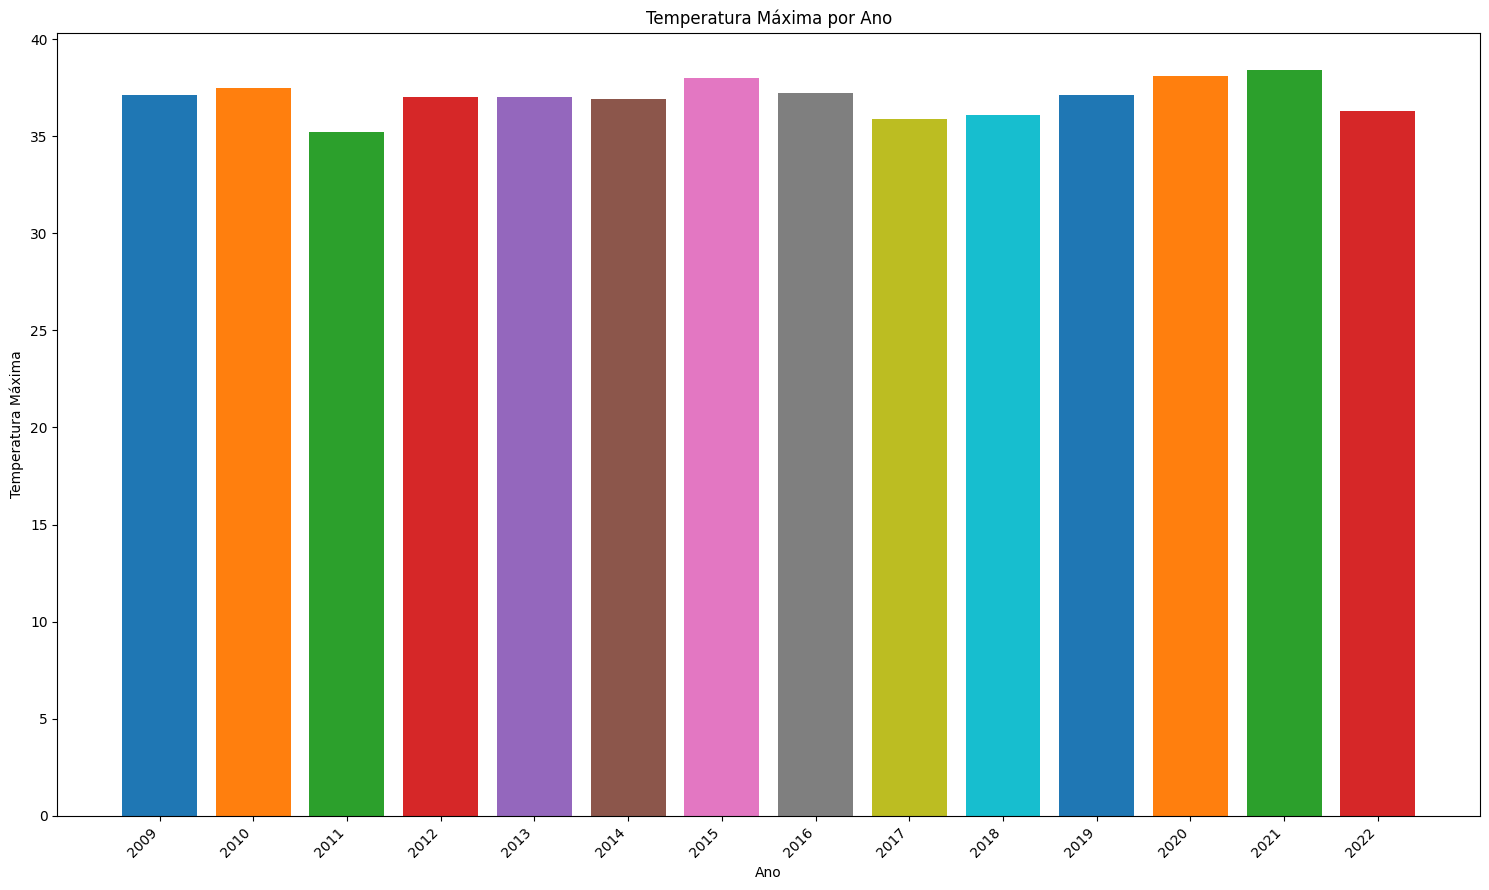

In [49]:
fig, ax = plt.subplots(figsize=(15, 9))

# Itera sobre cada ano e mês
for ano in range(2009, 2023):

    # Filtra os dados para o ano e mês atual
    dados_filtrados = df_max_temperature_per_year[(df_max_temperature_per_year['ano'] == ano)]
    
    # Verifica se há dados para o ano e mês atual
    if not dados_filtrados.empty:
        # Plota a barra para o ano e mês atual
        ax.bar(f"{ano}", dados_filtrados['TEM_MAX'].values[0])

# Ajusta a apresentação do gráfico
ax.set_xlabel('Ano')
ax.set_ylabel('Temperatura Máxima')
ax.set_title('Temperatura Máxima por Ano')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibe o gráfico
plt.show()